# Textiles Mexicanos
Se importan las librerías básicas

## 1 Preprocesamiento

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

Se realiza la matriz de correlación

In [ ]:
features = pd.read_csv("Limpio.csv")
features = features.iloc[:,1:]
corr = features.corr()
features.corr()

Juntamos las variables dependientes e independientes

In [13]:
# Se cargan las agrupaciones ( 1, 1, ..., 3)
labels = pd.read_csv("db/Labels.csv")
labels = labels.iloc[:,2].values

# Se añade una nueva columna ( x1, x2, ... , xn, y)
features["y"] = labels
features.to_csv("Regresion.csv")

# Separación de variable dependiente e independientes
X = features.iloc[:,:-1].values
Y = features.iloc[:,-1].values

Separamos los datos de prueba y entrenamiento

In [14]:
# PREPROCESAMIENTO
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

print(X[0:1])
print(Y[0:1])

[[ 0.00337295 -0.06090929  0.04436981 -0.07733339 -0.12020049  0.04915178
  -0.09281499 -0.12902319  0.20866329 -0.09260902 -0.14523923 -0.02626722
  -0.13717878  0.06608574  0.04010848 -0.02227136  0.02576424 -0.04034996
  -0.02892124  0.0150692 ]]
[4]


## 2 Regresión

### 2.1 Bosques Aleatorios

[4 0 2 1 0 4 5 4 4 1 4 4 0 2 3 1 5 2 3 2 4 4 4 2 1 3 2 2 2 0 1 3 5 1 2 3 4
 3 0 5 4 4 2 0 0 3 4 1 4 5 0 1 1 5 4 4 0 1 2 0 3 3 5 5 4 1 3 0 1 2 2 1 0 1
 3 4 0 0 2 3 2 5 4 4 4 3 1 0 0 0 1 2 4 2 3 1 3 5 0 4 5 4 2 5 1 3 4 4 0 2 1
 1 3 0 1 0 2 1 2 3 3 2 2 0 5 2 5 2 0 3 2 1 3 2 0 0 4 1 2 4 4 3 0 1 1 4 4 3
 4 5 0 4 4 0 3 1 1 4 0 0 1 0 5 1 3 0 4 1 1 0 3 2 1 0 2 2 2 4 1 4 0 4 0 0 1
 4 3 0 2 0 0 0 0 3 2 4 5 2 0 4 3 2 0 0 4 0 4 4 1]


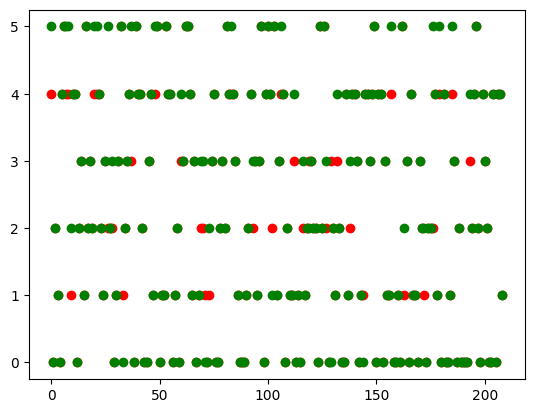

In [15]:
# BOSQUES ALEATORIOS
from sklearn.ensemble import RandomForestRegressor

# Entrenamiento
random_forest = RandomForestRegressor(n_estimators=100,random_state=0)
random_forest.fit(xtrain,ytrain)

# Predicción
ypred_rndfrst = random_forest.predict(xtest)
ypred_rndfrst = np.int32(ypred_rndfrst)
print(ypred_rndfrst)

# Visualización
ln = np.arange(0,len(ytest))
plt.scatter(ln,ypred_rndfrst,c="r")
plt.scatter(ln,ytest,c="g")

### 2.2 Máquinas de Soporte de Regresión

[4 0 1 1 0 3 4 4 4 1 3 4 0 2 3 1 5 2 3 2 3 4 4 1 1 3 3 2 2 1 2 3 5 2 1 3 4
 4 0 3 4 4 1 0 1 3 4 1 4 4 0 1 1 4 4 4 1 1 3 0 3 3 4 5 3 1 3 0 1 3 2 2 0 2
 3 4 0 0 1 2 2 4 4 4 4 2 0 0 0 0 1 2 3 3 3 1 2 4 0 4 4 3 1 4 0 3 4 3 0 2 1
 1 3 0 0 2 2 0 1 3 3 1 2 0 4 2 4 2 0 1 2 2 3 2 0 0 3 0 2 3 3 3 0 2 0 3 3 3
 3 5 0 3 3 0 2 0 1 4 0 0 1 0 4 2 3 0 3 1 1 0 3 2 1 0 1 2 3 4 1 4 0 3 0 0 1
 3 3 0 1 0 0 1 0 2 2 3 4 1 0 3 3 2 0 0 4 0 3 3 1]


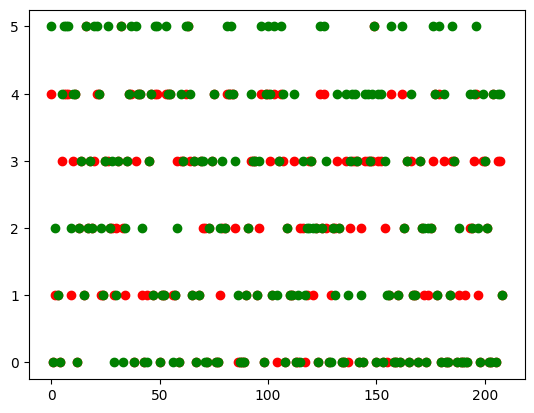

In [16]:
from sklearn.svm import SVR

# Entrenamiento
svr_regressor = SVR(kernel="rbf")
svr_regressor.fit(xtrain,ytrain)

# Predicción
y_predsvr = svr_regressor.predict(xtest)
y_predsvr = np.int32(y_predsvr)
print(y_predsvr)

# Resultados
plt.scatter(ln,y_predsvr,c="r")
plt.scatter(ln,ytest,c="g")